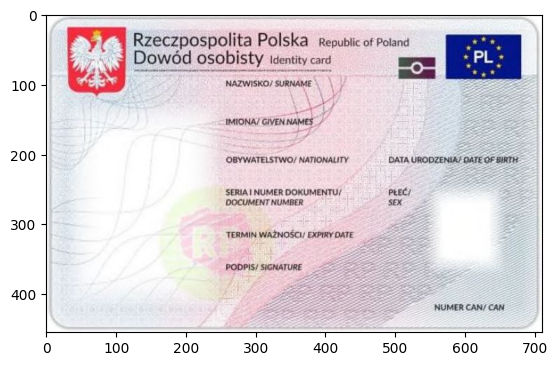

In [20]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

identity_card = cv2.imread('./wzor-dowod.jpg')

identity_card = cv2.cvtColor(identity_card, cv2.COLOR_BGR2RGB)

plt.imshow(identity_card)

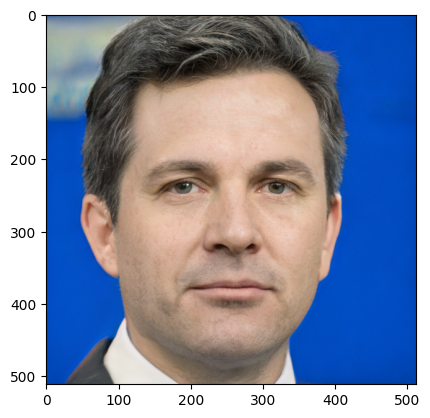

In [21]:
# load the face from ./faces/person01-1.png and place it on the image with the identity card

face = cv2.imread('./faces/person01-2.png')

face = cv2.cvtColor(face, cv2.COLOR_BGR2RGB)

plt.imshow(face)

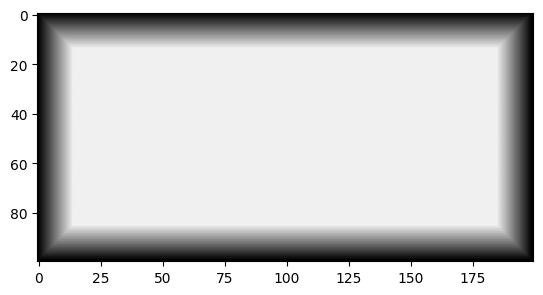

In [22]:
def create_mask(shape, *, offset=15, max=240):
    h, w = shape[:2]
    h = h - 2*offset
    w = w - 2*offset
    base_grad = np.linspace(0, max, offset) / 255

    corner = np.tile(base_grad, reps=(offset, 1))
    corner = np.min(np.dstack((corner, corner.T)), axis=2)

    left_edge = np.tile(base_grad, reps=(h, 1))
    top_edge = np.tile(base_grad, reps=(w, 1)).T

    top_edge = np.hstack((corner, top_edge, np.fliplr(corner)))

    mask = np.full((h, w), max / 255)
    mask = np.hstack((left_edge, mask, np.fliplr(left_edge)))
    mask = np.vstack((top_edge, mask, np.flipud(top_edge)))

    return np.dstack([mask]*3)


plt.imshow(create_mask((100, 200)), cmap="gray")
plt.show()

(256, 202)
(256, 202)


True

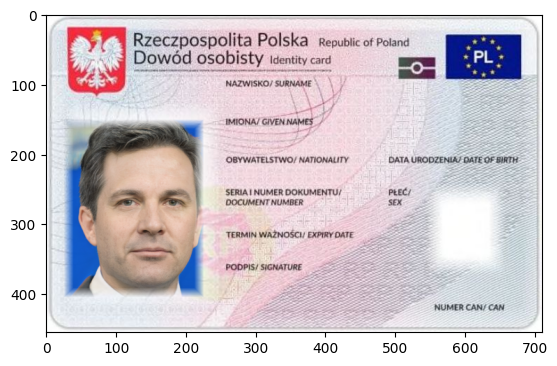

In [23]:
# Load the background image
background = cv2.imread('./wzor-dowod.jpg')

# Load the overlay image
overlay = cv2.imread('./faces/person01-2.png')

# crop overlay 10 percent from left and right
overlay = overlay[:, overlay.shape[1] //
                  100:overlay.shape[1] - overlay.shape[1]//5]

# scale down the overlay image by 30 percent
scale_percent = 50

width = int(overlay.shape[1] * scale_percent / 100)
height = int(overlay.shape[0] * scale_percent / 100)

dim = (width, height)

overlay = cv2.resize(overlay, dim, interpolation=cv2.INTER_AREA)

# Coordinates where the overlay should be placed
x, y = 25, 150

h, w = overlay.shape[:2]
print(overlay.shape[:2])

# Define the region of interest (ROI) in the background image
roi = background[y:y+h, x:x+w]

print(roi.shape[:2])

# Overlay the image
# result = cv2.addWeighted(roi, 0, overlay, 1, 0)
mask = create_mask(overlay.shape)
result = overlay * mask + roi * (1-mask)

# Place the result back into the original image
background[y:y+h, x:x+w] = result

identity_card = cv2.cvtColor(background, cv2.COLOR_BGR2RGB)

plt.imshow(identity_card)

# save the image

cv2.imwrite('./dowod.png', cv2.cvtColor(identity_card, cv2.COLOR_RGB2BGR))

True

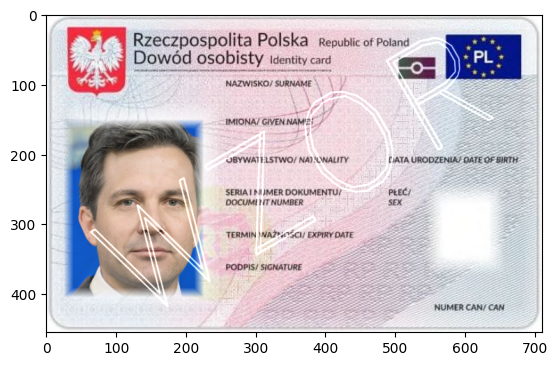

In [24]:
identity_card = cv2.imread('./dowod.png')

h, w = identity_card.shape[:2]
mask = np.zeros((h, w), dtype=np.uint8)
(tw, th), _ = cv2.getTextSize("WZOR", cv2.FONT_HERSHEY_DUPLEX, 7, 1)
cv2.putText(mask, "WZOR", ((w-tw)//2, (h+th)//2), cv2.FONT_HERSHEY_DUPLEX,
            7, color=(255), lineType=cv2.LINE_AA, thickness=1)
M = cv2.getRotationMatrix2D((w/2, h/2), 30, 1)
mask = cv2.warpAffine(mask, M, (w, h))
text = cv2.cvtColor(mask, cv2.COLOR_GRAY2BGR)

plt.imshow(mask)
result = cv2.add(identity_card, text, mask=~mask)
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))

cv2.imwrite('./dowod.png', result)

True

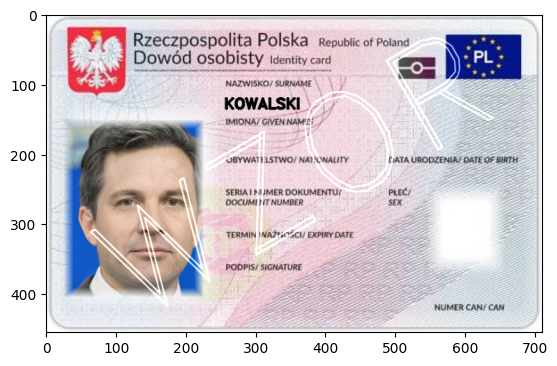

In [25]:
# write on identity card random last name

identity_card = cv2.imread('./dowod.png')

identity_card = cv2.cvtColor(identity_card, cv2.COLOR_BGR2RGB)

font = cv2.FONT_HERSHEY_DUPLEX

x, y = 255, 135

cv2.putText(identity_card, 'KOWALSKI', (x, y), font, 0.7, (0, 0, 0), 2, cv2.LINE_AA)

plt.imshow(identity_card)

cv2.imwrite('./dowod.png', cv2.cvtColor(identity_card, cv2.COLOR_RGB2BGR))


True

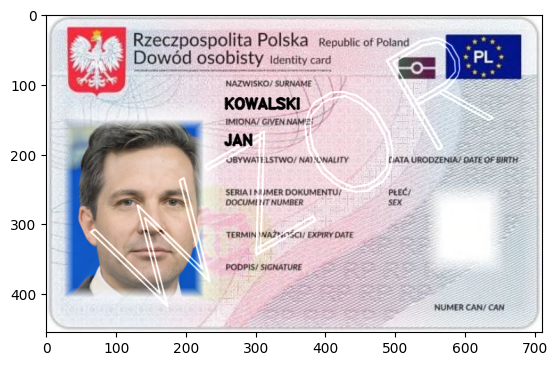

In [26]:
# write on identity card random first name

identity_card = cv2.imread('./dowod.png')

identity_card = cv2.cvtColor(identity_card, cv2.COLOR_BGR2RGB)

font = cv2.FONT_HERSHEY_DUPLEX

x, y = 255, 187

cv2.putText(identity_card, 'JAN', (x, y), font, 0.7, (0, 0, 0), 2, cv2.LINE_AA)

plt.imshow(identity_card)

cv2.imwrite('./dowod.png', cv2.cvtColor(identity_card, cv2.COLOR_RGB2BGR))

True

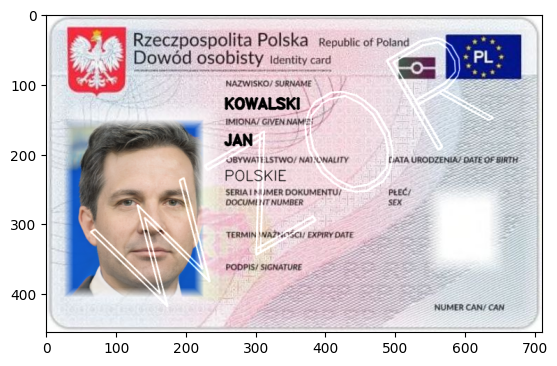

In [27]:
# write on identity card nationality

identity_card = cv2.imread('./dowod.png')

identity_card = cv2.cvtColor(identity_card, cv2.COLOR_BGR2RGB)

font = cv2.FONT_HERSHEY_SIMPLEX

x, y = 255, 238

cv2.putText(identity_card, 'POLSKIE', (x, y), font, 0.7, (0, 0, 0), 1, cv2.LINE_AA)

plt.imshow(identity_card)

cv2.imwrite('./dowod.png', cv2.cvtColor(identity_card, cv2.COLOR_RGB2BGR))


True

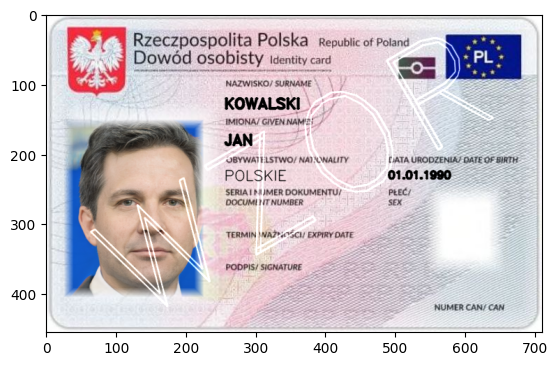

In [28]:
# write on identity card start date of birthday

identity_card = cv2.imread('./dowod.png')

identity_card = cv2.cvtColor(identity_card, cv2.COLOR_BGR2RGB)

font = cv2.FONT_HERSHEY_SIMPLEX

x, y = 490, 235

cv2.putText(identity_card, '01.01.1990', (x, y), font, 0.5, (0, 0, 0), 2, cv2.LINE_AA)

plt.imshow(identity_card)

cv2.imwrite('./dowod.png', cv2.cvtColor(identity_card, cv2.COLOR_RGB2BGR))

True

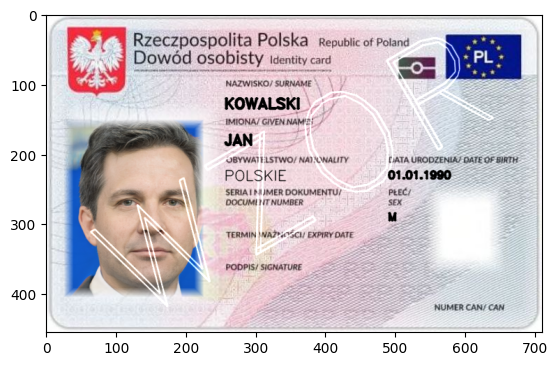

In [29]:
# write on identity card sex

identity_card = cv2.imread('./dowod.png')

identity_card = cv2.cvtColor(identity_card, cv2.COLOR_BGR2RGB)

font = cv2.FONT_HERSHEY_SIMPLEX

x, y = 490, 295

cv2.putText(identity_card, 'M', (x, y), font, 0.5, (0, 0, 0), 2, cv2.LINE_AA)

plt.imshow(identity_card)

cv2.imwrite('./dowod.png', cv2.cvtColor(identity_card, cv2.COLOR_RGB2BGR))

True

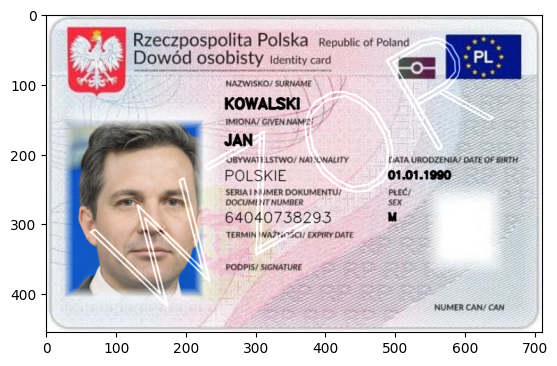

In [30]:
# write on identity card random PESEL

identity_card = cv2.imread('./dowod.png')

identity_card = cv2.cvtColor(identity_card, cv2.COLOR_BGR2RGB)

font = cv2.FONT_HERSHEY_SIMPLEX

x, y = 255, 298

cv2.putText(identity_card, '64040738293', (x, y), font, 0.7, (0, 0, 0), 1, cv2.LINE_AA)

plt.imshow(identity_card)

cv2.imwrite('./dowod.png', cv2.cvtColor(identity_card, cv2.COLOR_RGB2BGR))

True

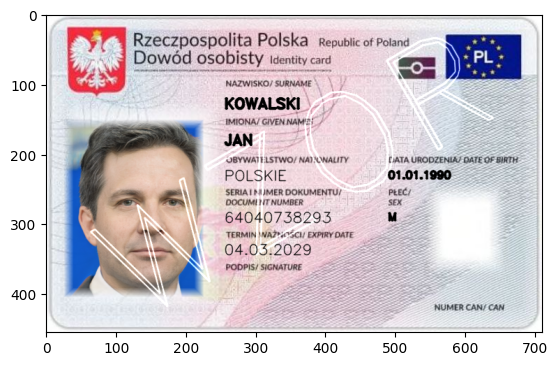

In [31]:
# write on identity card random validity date

identity_card = cv2.imread('./dowod.png')

identity_card = cv2.cvtColor(identity_card, cv2.COLOR_BGR2RGB)

font = cv2.FONT_HERSHEY_SIMPLEX

x, y = 255, 344

cv2.putText(identity_card, '04.03.2029', (x, y), font, 0.7, (0, 0, 0), 1, cv2.LINE_AA)

plt.imshow(identity_card)

cv2.imwrite('./dowod.png', cv2.cvtColor(identity_card, cv2.COLOR_RGB2BGR))

True

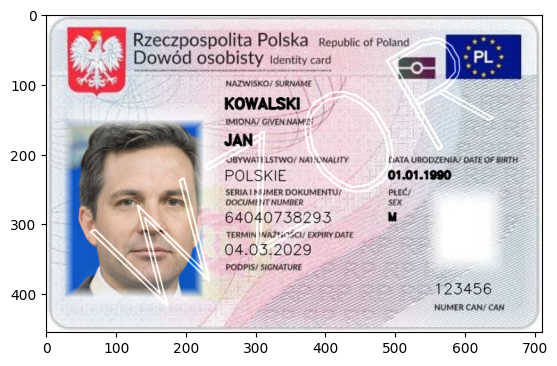

In [32]:
# write on identity card random CAN

identity_card = cv2.imread('./dowod.png')

identity_card = cv2.cvtColor(identity_card, cv2.COLOR_BGR2RGB)

font = cv2.FONT_HERSHEY_SIMPLEX

x, y = 555, 400

cv2.putText(identity_card, '123456', (x, y), font, 0.7, (0, 0, 0), 1, cv2.LINE_AA)

plt.imshow(identity_card)

cv2.imwrite('./dowod.png', cv2.cvtColor(identity_card, cv2.COLOR_RGB2BGR))

True

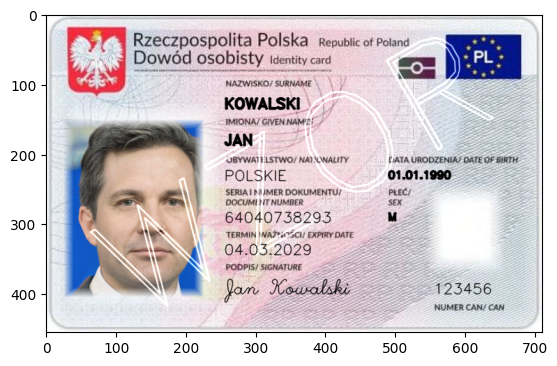

In [33]:
# write on idenity card random signature

identity_card = cv2.imread('./dowod.png')

identity_card = cv2.cvtColor(identity_card, cv2.COLOR_BGR2RGB)

font = cv2.FONT_HERSHEY_SCRIPT_SIMPLEX

x, y = 255, 400

cv2.putText(identity_card, 'Jan Kowalski', (x, y), font, 1, (0, 0, 0), 1, cv2.LINE_AA)

plt.imshow(identity_card)

cv2.imwrite('./dowod.png', cv2.cvtColor(identity_card, cv2.COLOR_RGB2BGR))

True

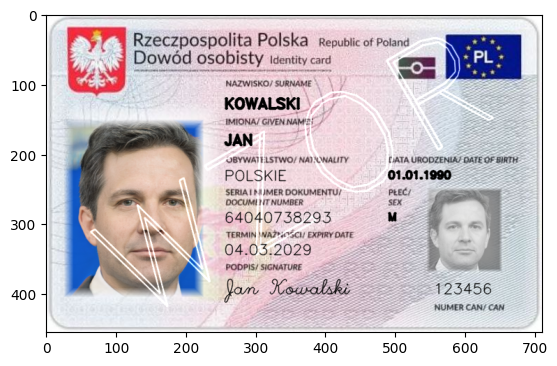

In [34]:
# place one more face on the identity card

background = cv2.imread('./dowod.png')

# Load the overlay image
overlay = cv2.imread('./faces/person01-2.png')

# crop overlay 10 percent from left and right
crop_factor = 20
overlay = overlay[:, overlay.shape[1] // crop_factor:overlay.shape[1] - overlay.shape[1]//crop_factor]

# scale down the overlay image by 30 percent
scale_percent = 24

width = int(overlay.shape[1] * scale_percent / 100)
height = int(overlay.shape[0] * scale_percent / 100)

dim = (width, height)

overlay = cv2.resize(overlay, dim, interpolation = cv2.INTER_AREA)
overlay = cv2.cvtColor(overlay, cv2.COLOR_BGR2GRAY)
overlay = cv2.cvtColor(overlay, cv2.COLOR_GRAY2BGR)

# Coordinates where the overlay should be placed
x, y = 545, 248

h, w = overlay.shape[:2]

# Define the region of interest (ROI) in the background image
roi = background[y:y+h, x:x+w]

# Overlay the image
# result = cv2.addWeighted(roi, 0.5, overlay, 0.6, 0)
mask = create_mask(overlay.shape, offset=6, max=150)
result = overlay * mask + roi * (1-mask)

# Place the result back into the original image
background[y:y+h, x:x+w] = result

identity_card = cv2.cvtColor(background, cv2.COLOR_BGR2RGB)

plt.imshow(identity_card)

cv2.imwrite('./dowod.png', cv2.cvtColor(identity_card, cv2.COLOR_RGB2BGR))